In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score
import xgboost as xgb
from matplotlib.colors import ListedColormap

In [114]:
import pandas as pd

# load the data
file_name = 'archive/DataCoSupplyChainDataset.csv'
df = pd.read_csv(file_name, encoding='ISO-8859-1')  

# print the first 5 rows
print(df.head())

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goo

In [115]:
# Load the CSV into a DataFrame
data_raw = pd.read_csv(file_name, encoding = "ISO-8859-1")

In [116]:

file_name2 = 'archive/DescriptionDataCoSupplyChain.csv'
df = pd.read_csv(file_name2, encoding='ISO-8859-1')  

# 查看加载的数据
print(df.head())

                          FIELDS  \
0                           Type   
1  Days for shipping (real)        
2  Days for shipment (scheduled)   
3              Benefit per order   
4             Sales per customer   

                                         DESCRIPTION  
0                        :  Type of transaction made  
1   :  Actual shipping days of the purchased product  
2  :  Days of scheduled delivery of the purchased...  
3                       :  Earnings per order placed  
4      :  Total sales per customer made per customer  


In [117]:
# load data description
data_description = pd.read_csv(file_name2, encoding = "ISO-8859-1")

Learning the Variables

Are all the features going to be helpful for our prediction task? In other words, do you expect any correlation or dependencies between the response variables and custormers' information (i.e. Custormer ID, Custormer Email, etc.)?
<br>
If not, then we may consider remove some of the redundant variables (categorical and continuous).

In [118]:
data_raw.select_dtypes(include = ["object"]).columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Image',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [119]:
data_raw.select_dtypes(include = ["object"])

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,...,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,...,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,2/3/2018 22:56,Standard Class
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,...,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Smart watch,1/18/2018 12:27,Standard Class
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,...,Bikaner,India,1/13/2018 12:06,South Asia,Rajastán,CLOSED,http://images.acmesports.sports/Smart+watch,Smart watch,1/17/2018 12:06,Standard Class
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,...,Townsville,Australia,1/13/2018 11:45,Oceania,Queensland,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,1/16/2018 11:45,Standard Class
4,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,...,Townsville,Australia,1/13/2018 11:24,Oceania,Queensland,PENDING_PAYMENT,http://images.acmesports.sports/Smart+watch,Smart watch,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Shipping on time,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,Peterson,XXXXXXXXX,Home Office,...,Shanghái,China,1/16/2016 3:40,Eastern Asia,Shanghái,CLOSED,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class
180515,DEBIT,Late delivery,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,Clark,XXXXXXXXX,Corporate,...,Hirakata,Japón,1/16/2016 1:34,Eastern Asia,Osaka,COMPLETE,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class
180516,TRANSFER,Late delivery,Fishing,Bristol,EE. UU.,XXXXXXXXX,John,Smith,XXXXXXXXX,Corporate,...,Adelaide,Australia,1/15/2016 21:00,Oceania,Australia del Sur,PENDING,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class
180517,PAYMENT,Advance shipping,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,...,Adelaide,Australia,1/15/2016 20:18,Oceania,Australia del Sur,PENDING_PAYMENT,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/18/2016 20:18,Standard Class


In [120]:
# removing redundant categorical features for modeling
remove_cat = ['Category Name', 'Customer City',
               'Customer Country', 'Customer Email',
               'Customer Fname', 'Customer Lname',
               'Customer Password', 'Customer State',
               'Customer Street', 'Department Name',
               'Market', 'Order City', 'Order Country',
               'Order Region', 'Order State', 'Product Image',
               'Product Name']

In [121]:
data_raw.select_dtypes(exclude = ["object"]).columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Latitude', 'Longitude', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Zipcode',
       'Product Card Id', 'Product Category Id', 'Product Description',
       'Product Price', 'Product Status'],
      dtype='object')

In [122]:
data_raw.select_dtypes(exclude = ["object"])

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,...,1,327.750000,314.640015,91.250000,NaN,1360,73,NaN,327.750000,0
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,...,1,327.750000,311.359985,-249.089996,NaN,1360,73,NaN,327.750000,0
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,...,1,327.750000,309.720001,-247.779999,NaN,1360,73,NaN,327.750000,0
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,...,1,327.750000,304.809998,22.860001,NaN,1360,73,NaN,327.750000,0
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,...,1,327.750000,298.250000,134.210007,NaN,1360,73,NaN,327.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,399.980011,0,45,1005,11207.0,7,40.640930,...,1,399.980011,399.980011,40.000000,NaN,1004,45,NaN,399.980011,0
180515,3,2,-613.770019,395.980011,1,45,9141,93304.0,7,35.362545,...,1,399.980011,395.980011,-613.770019,NaN,1004,45,NaN,399.980011,0
180516,5,4,141.110001,391.980011,1,45,291,6010.0,7,41.629959,...,1,399.980011,391.980011,141.110001,NaN,1004,45,NaN,399.980011,0
180517,3,4,186.229996,387.980011,0,45,2813,725.0,7,18.213350,...,1,399.980011,387.980011,186.229996,NaN,1004,45,NaN,399.980011,0


In [123]:
# removing redundant continuous features for modeling
remove_cts = ['Category Id', 'Customer Id', 'Customer Zipcode',
               'Department Id', 'Customer Id', 'Order Id',
               'Order Item Cardprod Id', 'Order Item Id',
               'Order Zipcode', 'Product Card Id', 'Product Category Id',
               'Product Description', 'Product Status', 'Latitude', 'Longitude',
               'Order Customer Id']

Now, let's do a brief EDA and prepare our data for modeling

Check for missing values

In [124]:
data_raw.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


Check for duplicate observations

In [125]:
data_raw.duplicated().any()

False

Remove redundant categorical and continuous features for modeling

In [126]:
remove_list = remove_cat + remove_cts
data_raw.drop(remove_list, axis=1, inplace=True)

# check the dimension of the data
data_raw.shape

(180519, 21)

Check for missing values after removing redundent features

In [127]:
data_raw.isna().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Customer Segment                 0
order date (DateOrders)          0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Order Status                     0
Product Price                    0
shipping date (DateOrders)       0
Shipping Mode                    0
dtype: int64

Plot a correlation heatmap

<AxesSubplot:>

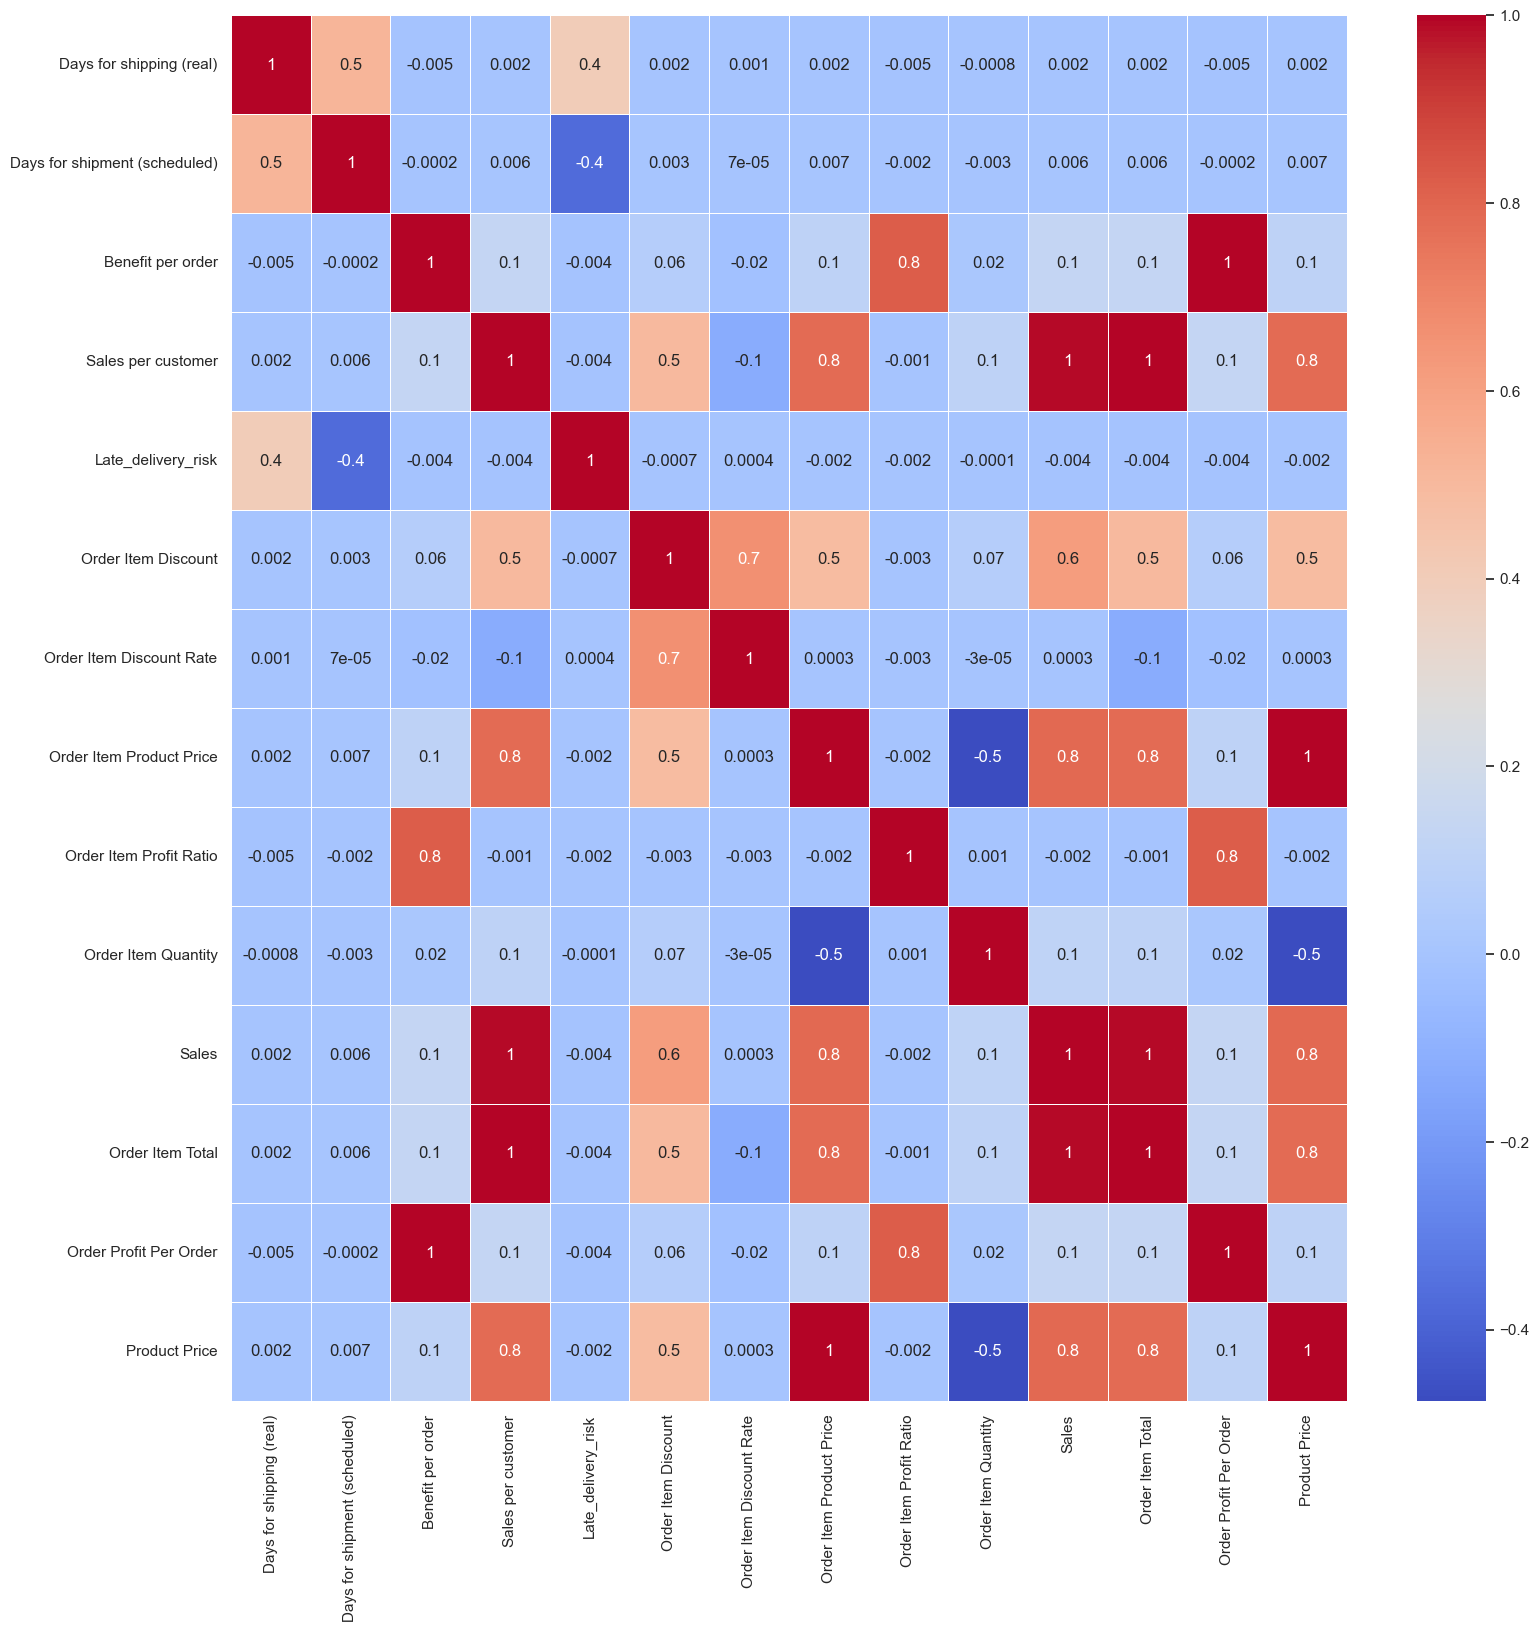

In [128]:
fig, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(data_raw.select_dtypes(exclude=['object']).corr(), annot = True, linewidths = 0.5, fmt = '.1g', cmap = 'coolwarm')

Encodings

In [129]:
# one-hot encoding for categorical variables
ohe_data = pd.get_dummies(data_raw, columns = ['Type', 'Shipping Mode'])
ohe_data[['Type_CASH', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class']] = ohe_data[['Type_CASH', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class']].astype(int)
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Benefit per order              180519 non-null  float64
 3   Sales per customer             180519 non-null  float64
 4   Delivery Status                180519 non-null  object 
 5   Late_delivery_risk             180519 non-null  int64  
 6   Customer Segment               180519 non-null  object 
 7   order date (DateOrders)        180519 non-null  object 
 8   Order Item Discount            180519 non-null  float64
 9   Order Item Discount Rate       180519 non-null  float64
 10  Order Item Product Price       180519 non-null  float64
 11  Order Item Profit Ratio        180519 non-null  float64
 12  Order Item Quantity           

In [130]:
data_raw.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Customer Segment,order date (DateOrders),Order Item Discount,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Status,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Consumer,1/31/2018 22:56,13.110000,...,327.75,0.29,1,327.75,314.640015,91.250000,COMPLETE,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Consumer,1/13/2018 12:27,16.389999,...,327.75,-0.80,1,327.75,311.359985,-249.089996,PENDING,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Consumer,1/13/2018 12:06,18.030001,...,327.75,-0.80,1,327.75,309.720001,-247.779999,CLOSED,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Home Office,1/13/2018 11:45,22.940001,...,327.75,0.08,1,327.75,304.809998,22.860001,COMPLETE,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Corporate,1/13/2018 11:24,29.500000,...,327.75,0.45,1,327.75,298.250000,134.210007,PENDING_PAYMENT,327.75,1/15/2018 11:24,Standard Class


Detect / Remove / Replace Outliers (if any)

In [131]:
# melt data frame into long format
data_melted = pd.melt(ohe_data.select_dtypes(include = ["float"]))
# view first 10 rows of melted data frame
data_melted.head(10)

,variable,value
0,Benefit per order,91.250000
1,Benefit per order,-249.089996
2,Benefit per order,-247.779999
3,Benefit per order,22.860001
4,Benefit per order,134.210007
5,Benefit per order,18.580000
6,Benefit per order,95.180000
7,Benefit per order,68.430000
8,Benefit per order,133.720001
9,Benefit per order,132.149994


<AxesSubplot:xlabel='value', ylabel='variable'>

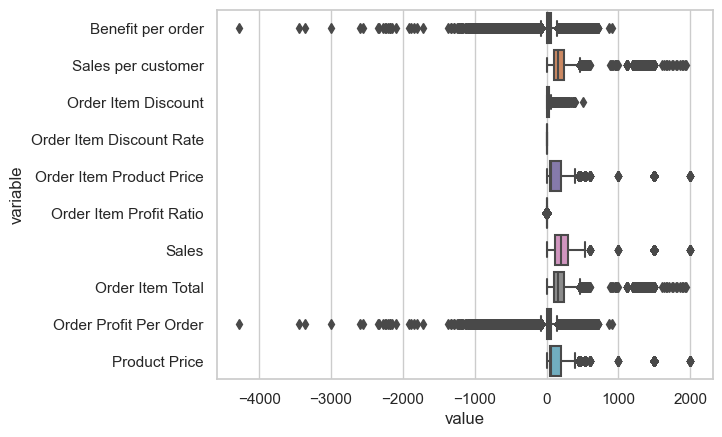

In [132]:
sns.boxplot(y='variable', x='value', data = data_melted)

In [133]:
# Z-score
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    sample_outliers = detect_outliers_zscore(ohe_data[i])
    print("Outliers length in '", i, "' from Z-scores method: ", len(sample_outliers))
    print("10 Outliers Sample in '", i, "' from Z-scores method: ", sample_outliers[:10])
    print('\n')

Outliers length in ' Benefit per order ' from Z-scores method:  3608
10 Outliers Sample in ' Benefit per order ' from Z-scores method:  [-425.5799866, -783.6699829, 595.3499756, 415.7999878, -459.0, -447.0499878, -459.6700134, -540.789978, -652.4299927, -790.4199829]


Outliers length in ' Sales per customer ' from Z-scores method:  477
10 Outliers Sample in ' Sales per customer ' from Z-scores method:  [1417.5, 1395.0, 1365.0, 1200.0, 989.9899902, 1230.0, 1275.0, 1245.0, 1125.0, 1417.5]


Outliers length in ' Order Item Discount ' from Z-scores method:  2106
10 Outliers Sample in ' Order Item Discount ' from Z-scores method:  [112.4899979, 105.0, 135.0, 300.0, 113.0100021, 124.9899979, 99.98999786, 89.98999786, 89.98999786, 89.98999786]


Outliers length in ' Order Item Discount Rate ' from Z-scores method:  0
10 Outliers Sample in ' Order Item Discount Rate ' from Z-scores method:  []


Outliers length in ' Order Item Product Price ' from Z-scores method:  488
10 Outliers Sample in '

In [134]:
# IQR
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    sample_outliers = detect_outliers_iqr(ohe_data[i])
    print("Outliers length in '", i, "' from IQR method: ", len(sample_outliers))
    print("10 Outliers Sample in '", i, "' from IQR method: ", sample_outliers[:10])
    print('\n')

Outliers length in ' Benefit per order ' from IQR method:  18942
10 Outliers Sample in ' Benefit per order ' from IQR method:  [-4274.97998, -3442.5, -3366.0, -3000.0, -2592.0, -2550.0, -2351.25, -2328.0, -2280.0, -2255.25]


Outliers length in ' Sales per customer ' from IQR method:  1943
10 Outliers Sample in ' Sales per customer ' from IQR method:  [463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963]


Outliers length in ' Order Item Discount ' from IQR method:  7537
10 Outliers Sample in ' Order Item Discount ' from IQR method:  [67.48999786, 67.48999786, 67.48999786, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756]


Outliers length in ' Order Item Discount Rate ' from IQR method:  0
10 Outliers Sample in ' Order Item Discount Rate ' from IQR method:  []


Outliers length in ' Order Item Product Price ' from IQR method:  2048
10 Outliers Sample in ' Order Item Pr

In [135]:
# Removing outliers from z-score method and replacing the removed with median
for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    median = np.median(ohe_data[i])
    sample_outliers = detect_outliers_zscore(ohe_data[i])
    print("Outliers length in '", i, "' from Z-scores method: ", len(sample_outliers))
    for j in sample_outliers:
        ohe_data.loc[ohe_data[i] == j, i] = median
    print('Outliers have been removed and replaced with median')

Outliers length in ' Benefit per order ' from Z-scores method:  3608
Outliers have been removed and replaced with median
Outliers length in ' Sales per customer ' from Z-scores method:  477
Outliers have been removed and replaced with median
Outliers length in ' Order Item Discount ' from Z-scores method:  2106
Outliers have been removed and replaced with median
Outliers length in ' Order Item Discount Rate ' from Z-scores method:  0
Outliers have been removed and replaced with median
Outliers length in ' Order Item Product Price ' from Z-scores method:  488
Outliers have been removed and replaced with median
Outliers length in ' Order Item Profit Ratio ' from Z-scores method:  6013
Outliers have been removed and replaced with median
Outliers length in ' Sales ' from Z-scores method:  467
Outliers have been removed and replaced with median
Outliers length in ' Order Item Total ' from Z-scores method:  477
Outliers have been removed and replaced with median
Outliers length in ' Order Pr

In [136]:
# IQR
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    sample_outliers = detect_outliers_iqr(ohe_data[i])
    print("Outliers length in '", i, "' from IQR method: ", len(sample_outliers))
    print("10 Outliers Sample in '", i, "' from IQR method: ", sample_outliers[:10])
    print('\n')

Outliers length in ' Benefit per order ' from IQR method:  16359
10 Outliers Sample in ' Benefit per order ' from IQR method:  [-291.1900024, -291.1900024, -291.1900024, -291.1900024, -291.1900024, -291.1900024, -291.1900024, -291.1900024, -291.1900024, -291.1700134]


Outliers length in ' Sales per customer ' from IQR method:  1495
10 Outliers Sample in ' Sales per customer ' from IQR method:  [460.3500061, 460.7000122, 461.480011, 461.480011, 461.480011, 461.480011, 461.480011, 461.480011, 461.480011, 461.480011]


Outliers length in ' Order Item Discount ' from IQR method:  7297
10 Outliers Sample in ' Order Item Discount ' from IQR method:  [62.47999954, 62.47999954, 62.47999954, 62.47999954, 62.47999954, 62.47999954, 62.47999954, 62.47999954, 62.47999954, 62.47999954]


Outliers length in ' Order Item Discount Rate ' from IQR method:  0
10 Outliers Sample in ' Order Item Discount Rate ' from IQR method:  []


Outliers length in ' Order Item Product Price ' from IQR method:  1560
1

In [137]:
# Convert dates to DateTime
data_raw['Order Date'] = pd.to_datetime(data_raw['order date (DateOrders)'])
data_raw['Shipping Date'] = pd.to_datetime(data_raw['shipping date (DateOrders)'])


data_raw['Order Processing Time'] = (data_raw['Shipping Date'] - data_raw['Order Date']).dt.days #get order Processing Time in days
data_raw['Order Month'] = data_raw['Order Date'].dt.month
data_raw['Discounted Item'] = data_raw['Order Item Discount Rate'].apply(lambda x: 1 if x > 0 else 0) #Check if Item is discounted

#Removing highly coorelated fields to avoid multi colinearity
redundant_columns = [
    'Order Item Total',
    'Order Item Product Price',
    'Order Item Profit Ratio',
    'Order Item Discount Rate',
    'order date (DateOrders)', # We have Order Date
    'shipping date (DateOrders)', #we Have Shipping Date
    'Order Profit Per Order', # Benefit Per Order already exists
]

# Drop the redundant columns
data_raw = data_raw.drop(columns=redundant_columns)
data_raw.head(10)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Customer Segment,Order Item Discount,Order Item Quantity,Sales,Order Status,Product Price,Shipping Mode,Order Date,Shipping Date,Order Processing Time,Order Month,Discounted Item
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Consumer,13.110000,1,327.75,COMPLETE,327.75,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00,3,1,1
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Consumer,16.389999,1,327.75,PENDING,327.75,Standard Class,2018-01-13 12:27:00,2018-01-18 12:27:00,5,1,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Consumer,18.030001,1,327.75,CLOSED,327.75,Standard Class,2018-01-13 12:06:00,2018-01-17 12:06:00,4,1,1
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Home Office,22.940001,1,327.75,COMPLETE,327.75,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00,3,1,1
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Corporate,29.500000,1,327.75,PENDING_PAYMENT,327.75,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00,2,1,1
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,Consumer,32.779999,1,327.75,CANCELED,327.75,Standard Class,2018-01-13 11:03:00,2018-01-19 11:03:00,6,1,1
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,Home Office,39.330002,1,327.75,COMPLETE,327.75,First Class,2018-01-13 10:42:00,2018-01-15 10:42:00,2,1,1
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,Corporate,42.610001,1,327.75,PROCESSING,327.75,First Class,2018-01-13 10:21:00,2018-01-15 10:21:00,2,1,1
8,CASH,3,2,133.720001,278.589996,Late delivery,1,Corporate,49.160000,1,327.75,CLOSED,327.75,Second Class,2018-01-13 10:00:00,2018-01-16 10:00:00,3,1,1
9,CASH,2,1,132.149994,275.309998,Late delivery,1,Corporate,52.439999,1,327.75,CLOSED,327.75,First Class,2018-01-13 09:39:00,2018-01-15 09:39:00,2,1,1


<AxesSubplot:>

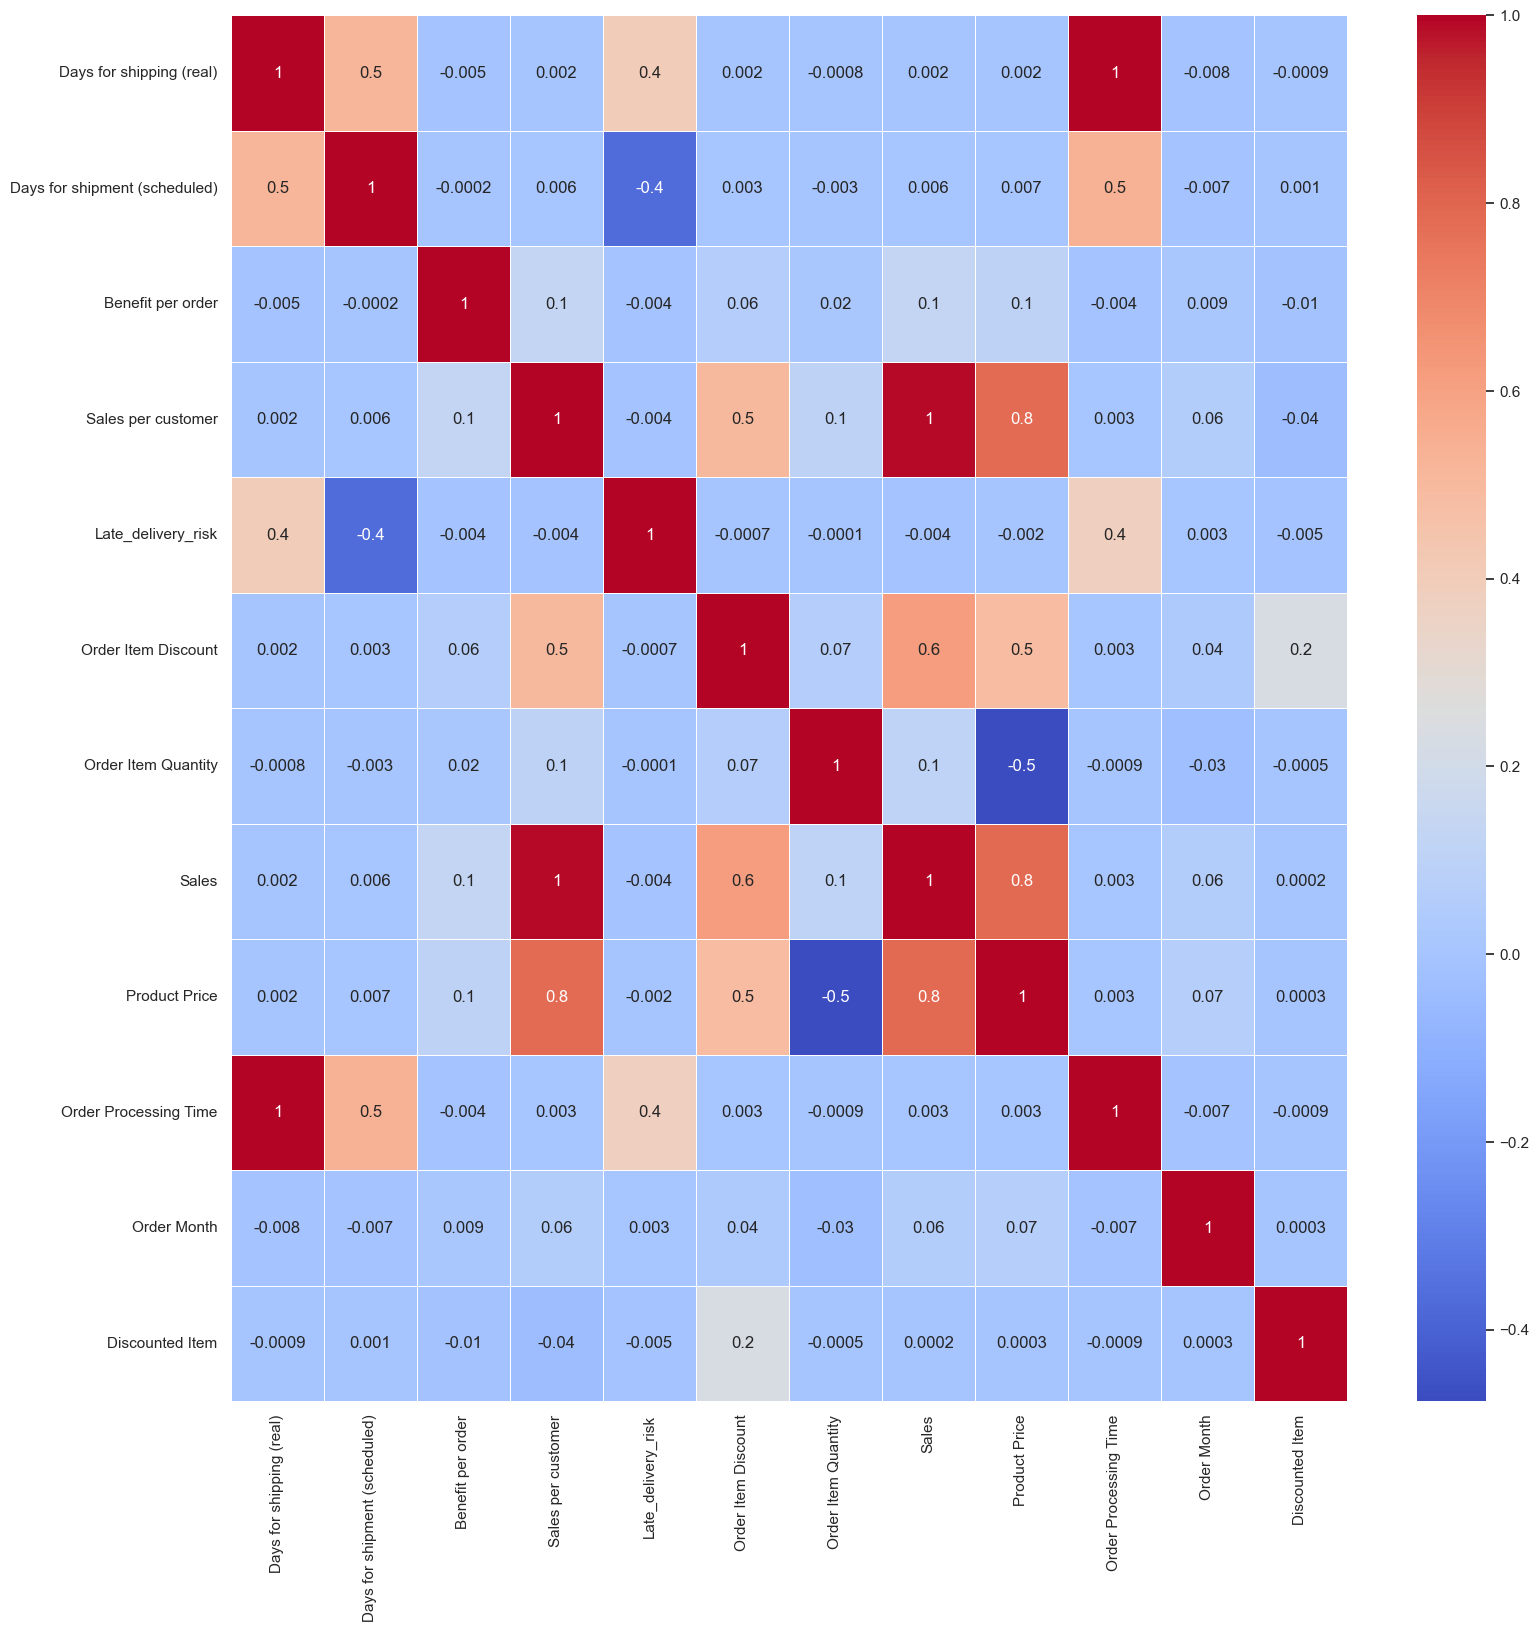

In [138]:
# plotting co-relation matrix after removing outliers

fig, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(data_raw.select_dtypes(exclude=['object']).corr(), annot = True, linewidths = 0.5, fmt = '.1g', cmap = 'coolwarm')

The correlation matrix indicates the following relationships in the dataset:

1. **Sales and Product Price** – Strong positive correlation (~0.8), showing that as product price increases, sales increase proportionally.
2. **Order Processing Time and Days for Shipment (scheduled)** – Moderate correlation (~0.5), suggesting that longer processing times may lead to extended shipment schedules.
3. **Sales per Customer and Sales** – High correlation (~0.8), indicating that these metrics provide similar information about revenue per customer.
4. **Benefit per Order and Product Price** – Moderate correlation, implying that higher-priced products tend to yield higher order benefits.
5. **Order Item Quantity and Sales** – Negative correlation (~-0.5), suggesting that higher quantities may reduce per-item revenue.

Redundant features could include **Product Price** (given its overlap with **Sales**) and **Sales per Customer** (overlapping with **Sales**).


In [139]:
#Removing highly coorelated fields to avoid multi colinearity
redundant_columns = [
    'Product Price',
    'Sales per customer',
]

# Drop the redundant columns
data_raw = data_raw.drop(columns=redundant_columns)
data_raw.head(10)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Customer Segment,Order Item Discount,Order Item Quantity,Sales,Order Status,Shipping Mode,Order Date,Shipping Date,Order Processing Time,Order Month,Discounted Item
0,DEBIT,3,4,91.250000,Advance shipping,0,Consumer,13.110000,1,327.75,COMPLETE,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00,3,1,1
1,TRANSFER,5,4,-249.089996,Late delivery,1,Consumer,16.389999,1,327.75,PENDING,Standard Class,2018-01-13 12:27:00,2018-01-18 12:27:00,5,1,1
2,CASH,4,4,-247.779999,Shipping on time,0,Consumer,18.030001,1,327.75,CLOSED,Standard Class,2018-01-13 12:06:00,2018-01-17 12:06:00,4,1,1
3,DEBIT,3,4,22.860001,Advance shipping,0,Home Office,22.940001,1,327.75,COMPLETE,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00,3,1,1
4,PAYMENT,2,4,134.210007,Advance shipping,0,Corporate,29.500000,1,327.75,PENDING_PAYMENT,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00,2,1,1
5,TRANSFER,6,4,18.580000,Shipping canceled,0,Consumer,32.779999,1,327.75,CANCELED,Standard Class,2018-01-13 11:03:00,2018-01-19 11:03:00,6,1,1
6,DEBIT,2,1,95.180000,Late delivery,1,Home Office,39.330002,1,327.75,COMPLETE,First Class,2018-01-13 10:42:00,2018-01-15 10:42:00,2,1,1
7,TRANSFER,2,1,68.430000,Late delivery,1,Corporate,42.610001,1,327.75,PROCESSING,First Class,2018-01-13 10:21:00,2018-01-15 10:21:00,2,1,1
8,CASH,3,2,133.720001,Late delivery,1,Corporate,49.160000,1,327.75,CLOSED,Second Class,2018-01-13 10:00:00,2018-01-16 10:00:00,3,1,1
9,CASH,2,1,132.149994,Late delivery,1,Corporate,52.439999,1,327.75,CLOSED,First Class,2018-01-13 09:39:00,2018-01-15 09:39:00,2,1,1


In [140]:
# Filter for canceled orders
canceled_orders_df = data_raw[data_raw['Order Status'] == 'CANCELED']
canceled_orders_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Customer Segment,Order Item Discount,Order Item Quantity,Sales,Order Status,Shipping Mode,Order Date,Shipping Date,Order Processing Time,Order Month,Discounted Item
5,TRANSFER,6,4,18.580000,Shipping canceled,0,Consumer,32.779999,1,327.750000,CANCELED,Standard Class,2018-01-13 11:03:00,2018-01-19 11:03:00,6,1,1
23,TRANSFER,3,2,17.700001,Shipping canceled,0,Corporate,32.779999,1,327.750000,CANCELED,Second Class,2018-01-13 04:45:00,2018-01-16 04:45:00,3,1,1
39,TRANSFER,1,0,57.299999,Shipping canceled,0,Consumer,22.940001,1,327.750000,CANCELED,Same Day,2018-01-12 23:09:00,2018-01-13 11:09:00,0,1,1
199,TRANSFER,2,4,-12.990000,Shipping canceled,0,Consumer,12.000000,4,239.960007,CANCELED,Standard Class,2016-09-09 22:05:00,2016-09-11 22:05:00,2,9,1
200,TRANSFER,6,4,74.040001,Shipping canceled,0,Consumer,35.990002,4,239.960007,CANCELED,Standard Class,2016-08-26 12:38:00,2016-09-01 12:38:00,6,8,1


In [141]:
# Filter for entries where 'Days for shipping (real)' is less than 'Days for shipment (scheduled)'
faster_shipping_df = canceled_orders_df[canceled_orders_df['Days for shipping (real)'] < canceled_orders_df['Days for shipment (scheduled)']]

faster_shipping_df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Customer Segment,Order Item Discount,Order Item Quantity,Sales,Order Status,Shipping Mode,Order Date,Shipping Date,Order Processing Time,Order Month,Discounted Item
199,TRANSFER,2,4,-12.990000,Shipping canceled,0,Consumer,12.00,4,239.960007,CANCELED,Standard Class,2016-09-09 22:05:00,2016-09-11 22:05:00,2,9,1
204,TRANSFER,2,4,3.040000,Shipping canceled,0,Consumer,19.99,4,99.959999,CANCELED,Standard Class,2016-09-03 15:26:00,2016-09-05 15:26:00,2,9,1
368,TRANSFER,2,4,114.209999,Shipping canceled,0,Corporate,13.11,1,327.750000,CANCELED,Standard Class,2018-01-12 17:53:00,2018-01-14 17:53:00,2,1,1
695,TRANSFER,3,4,-101.239998,Shipping canceled,0,Consumer,50.00,5,499.950012,CANCELED,Standard Class,2016-02-09 22:54:00,2016-02-12 22:54:00,3,2,1
758,TRANSFER,2,4,-109.419998,Shipping canceled,0,Consumer,9.60,4,239.960007,CANCELED,Standard Class,2017-07-05 12:22:00,2017-07-07 12:22:00,2,7,1


In [142]:
# Count entries where 'Days for shipping (real)' is less than 'Days for shipment (scheduled)'
faster_shipping_count = (canceled_orders_df['Days for shipping (real)'] < canceled_orders_df['Days for shipment (scheduled)']).sum()

# Count entries where 'Days for shipping (real)' is less than 'Days for shipment (scheduled)'
delay_shipping_count = (canceled_orders_df['Days for shipping (real)'] > canceled_orders_df['Days for shipment (scheduled)']).sum()

# Display the count
print("Count of Cancelled orders with faster actual shipping than scheduled:", faster_shipping_count)
print("Count of Cancelled orders with delay in shipping than scheduled:", delay_shipping_count)


Count of Cancelled orders with faster actual shipping than scheduled: 849
Count of Cancelled orders with delay in shipping than scheduled: 2107


Creating a new variable late_delivery which is independent of the order status. if order is delayed the late_delivery = 1 else 0 based on Days for shipping (real) and Days for shipment (Scheduled). This would be our class variable.


In [143]:
# Create our new class variable late_delivery
data_raw['late_delivery'] = (data_raw['Days for shipping (real)'] > data_raw['Days for shipment (scheduled)']).astype(int)
data_raw.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Customer Segment,Order Item Discount,Order Item Quantity,Sales,Order Status,Shipping Mode,Order Date,Shipping Date,Order Processing Time,Order Month,Discounted Item,late_delivery
0,DEBIT,3,4,91.250000,Advance shipping,0,Consumer,13.110000,1,327.75,COMPLETE,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00,3,1,1,0
1,TRANSFER,5,4,-249.089996,Late delivery,1,Consumer,16.389999,1,327.75,PENDING,Standard Class,2018-01-13 12:27:00,2018-01-18 12:27:00,5,1,1,1
2,CASH,4,4,-247.779999,Shipping on time,0,Consumer,18.030001,1,327.75,CLOSED,Standard Class,2018-01-13 12:06:00,2018-01-17 12:06:00,4,1,1,0
3,DEBIT,3,4,22.860001,Advance shipping,0,Home Office,22.940001,1,327.75,COMPLETE,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00,3,1,1,0
4,PAYMENT,2,4,134.210007,Advance shipping,0,Corporate,29.500000,1,327.75,PENDING_PAYMENT,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00,2,1,1,0


In [144]:
print("Columns in the original dataset:", data_raw.columns.tolist())

Columns in the original dataset: ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Delivery Status', 'Late_delivery_risk', 'Customer Segment', 'Order Item Discount', 'Order Item Quantity', 'Sales', 'Order Status', 'Shipping Mode', 'Order Date', 'Shipping Date', 'Order Processing Time', 'Order Month', 'Discounted Item', 'late_delivery']


In [145]:
# filter the known features
def filter_known_features(data_raw):
    # print the columns in the original dataset
    print("Columns in the original dataset:", data_raw.columns.tolist())
    
    # create a new feature 'Order Processing Time'
    data_raw['late_delivery'] = (data_raw['Days for shipping (real)'] > data_raw['Days for shipment (scheduled)']).astype(int)
    
    
    if 'Order Date' in data_raw.columns:
        data_raw['Order date (DateOrders)'] = pd.to_datetime(data_raw['Order Date'])
    else:
        raise KeyError("Could not find 'Order Date' in the dataset columns.")
    
    # abtract the year, month, day, and weekday from the 'Order date (DateOrders)'
    data_raw['Order Year'] = data_raw['Order date (DateOrders)'].dt.year
    data_raw['Order Month'] = data_raw['Order date (DateOrders)'].dt.month
    data_raw['Order Day'] = data_raw['Order date (DateOrders)'].dt.day
    data_raw['Order Weekday'] = data_raw['Order date (DateOrders)'].dt.weekday

    # print the columns after adding date features
    print("Columns after adding date features:", data_raw.columns.tolist())

    # fliter the known features before delivery
    known_features = [
        'Days for shipment (scheduled)', 'Order Processing Time', 'Order Item Quantity',
        'Order Month', 'Discounted Item', 'Order Year', 'Order Day', 'Order Weekday',
        'Type', 'Shipping Mode', 'Customer Segment', 'Order Status', 'late_delivery'
    ]
    
    # return the filtered dataset
    data_filtered = data_raw[known_features]
    return data_filtered

# filter the known features
data_filtered = filter_known_features(data_raw)


Columns in the original dataset: ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Delivery Status', 'Late_delivery_risk', 'Customer Segment', 'Order Item Discount', 'Order Item Quantity', 'Sales', 'Order Status', 'Shipping Mode', 'Order Date', 'Shipping Date', 'Order Processing Time', 'Order Month', 'Discounted Item', 'late_delivery']
Columns after adding date features: ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Delivery Status', 'Late_delivery_risk', 'Customer Segment', 'Order Item Discount', 'Order Item Quantity', 'Sales', 'Order Status', 'Shipping Mode', 'Order Date', 'Shipping Date', 'Order Processing Time', 'Order Month', 'Discounted Item', 'late_delivery', 'Order date (DateOrders)', 'Order Year', 'Order Day', 'Order Weekday']


In [146]:
# 1. Preprocess the data
def preprocess_data(data_filtered):
    # one-hot encoding
    data_processed = pd.get_dummies(data_filtered, columns=['Type', 'Shipping Mode', 'Customer Segment', 'Order Status'], drop_first=True)

    # abstract the target column
    X = data_processed.drop('late_delivery', axis=1)
    y_class = data_processed['late_delivery']
    
    return X, y_class

# preprocess_data
X, y_class = preprocess_data(data_filtered)




### Decision Boundary Analysis

Based on the decision boundary plots:

- **XGBoost Classifier**: The decision boundary is more complex and adaptable, capturing subtle patterns in the data. This flexibility allows it to handle non-linear relationships effectively, which can be advantageous for accurate delivery delay predictions.

- **Random Forest Classifier**: The decision boundary is also non-linear but appears less refined than XGBoost's. While it captures some complexity, it may be slightly less adaptable, potentially leading to lower accuracy in certain scenarios.

- **Logistic Regression Classifier**: The decision boundary is linear, which limits its ability to capture complex patterns. This model may struggle with non-linear data structures, potentially making it less accurate for complex tasks like delivery delay prediction.

**Summary**: XGBoost’s more nuanced decision boundary makes it well-suited for complex data structures in this task.


/Users/jesmyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


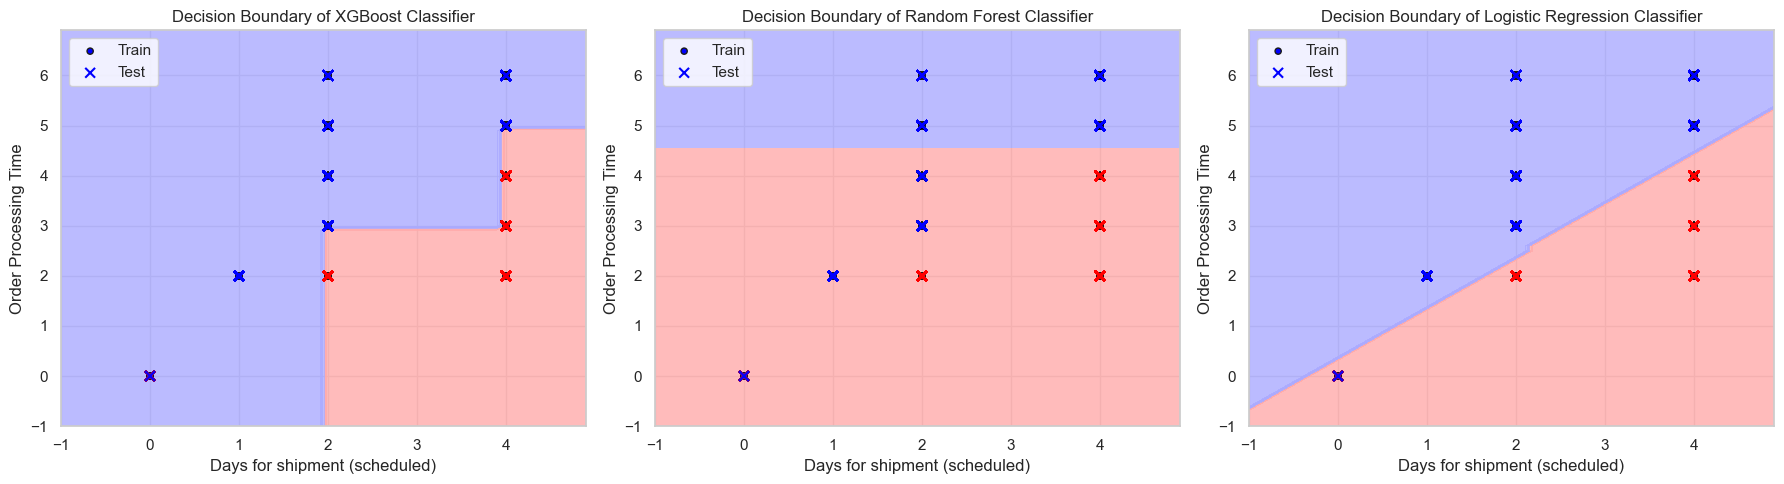

XGBoost Classification Accuracy: 0.9900
Random Forest Classification Accuracy: 0.9923
Logistic Regression Classification Accuracy: 0.9744


In [147]:


# 2. Classify the data
def train_classifiers(X_train, y_train):
    xrboost_classifier = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
    xrboost_classifier.fit(X_train, y_train)
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    logistic_classifier = LogisticRegression(random_state=42, max_iter=500)
    logistic_classifier.fit(X_train, y_train)
    
    return xrboost_classifier, rf_classifier, logistic_classifier

# 3. Plot the decision boundaries
def plot_decision_boundaries(X_train, y_train, X_test, y_test, classifiers):

    plot_X_train = X_train[['Days for shipment (scheduled)', 'Order Processing Time']]
    plot_X_test = X_test[['Days for shipment (scheduled)', 'Order Processing Time']]

    x_min, x_max = plot_X_train.iloc[:, 0].min() - 1, plot_X_train.iloc[:, 0].max() + 1
    y_min, y_max = plot_X_train.iloc[:, 1].min() - 1, plot_X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    plt.figure(figsize=(18, 5))
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    titles = ["XGBoost Classifier", "Random Forest Classifier", "Logistic Regression Classifier"]
    
    for i, (clf, title) in enumerate(zip(classifiers, titles)):
  
        grid_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['Days for shipment (scheduled)', 'Order Processing Time'])
        for col in X_train.columns:
            if col not in grid_data.columns:
                grid_data[col] = X_train[col].mean()
        Z = clf.predict(grid_data)
        Z = Z.reshape(xx.shape)
        
        # plot the decision boundary
        plt.subplot(1, 3, i + 1)
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
        plt.scatter(plot_X_train.iloc[:, 0], plot_X_train.iloc[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label="Train")
        plt.scatter(plot_X_test.iloc[:, 0], plot_X_test.iloc[:, 1], c=y_test, cmap=cmap_bold, s=50, marker='x', label="Test")
        plt.xlabel("Days for shipment (scheduled)")
        plt.ylabel("Order Processing Time")
        plt.title(f"Decision Boundary of {title}")
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# 4. Evaluate the models
def evaluate_models(X_test, y_test, classifiers):
    accuracy_scores = {}
    for name, clf in zip(["XGBoost", "Random Forest", "Logistic Regression"], classifiers):
        y_pred = clf.predict(X_test)
        accuracy_scores[name] = accuracy_score(y_test, y_pred)
        print(f'{name} Classification Accuracy: {accuracy_scores[name]:.4f}')

# Main function
def main(data_filtered):
    # Preprocess the data
    X, y_class = preprocess_data(data_filtered)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

    # Train the classifiers
    classifiers = train_classifiers(X_train, y_train)

    # Plot the decision boundaries
    plot_decision_boundaries(X_train, y_train, X_test, y_test, classifiers)

    # Evaluate the models
    evaluate_models(X_test, y_test, classifiers)

# Call the main function
main(data_filtered)

/Users/jesmyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


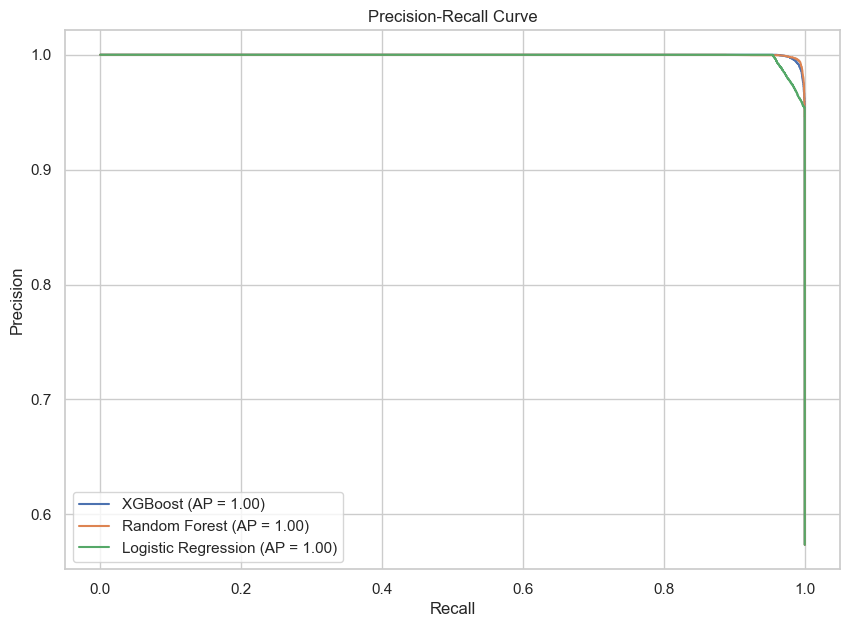

In [148]:
# preprocess the data
def preprocess_data(data_filtered):
    data_processed = pd.get_dummies(data_filtered, columns=['Type', 'Shipping Mode', 'Customer Segment', 'Order Status'], drop_first=True)

    X = data_processed.drop('late_delivery', axis=1)
    y_class = data_processed['late_delivery']
    
    return X, y_class

# train the classifiers
def train_classifiers(X_train, y_train):
    xrboost_classifier = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
    xrboost_classifier.fit(X_train, y_train)
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    logistic_classifier = LogisticRegression(random_state=42, max_iter=500)
    logistic_classifier.fit(X_train, y_train)
    
    return xrboost_classifier, rf_classifier, logistic_classifier

# plot the precision-recall curve
def plot_precision_recall_curve(classifiers, X_test, y_test):
    plt.figure(figsize=(10, 7))
    model_names = ["XGBoost", "Random Forest", "Logistic Regression"]
    
    for clf, name in zip(classifiers, model_names):
        y_scores = clf.predict_proba(X_test)[:, 1]  
        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        avg_precision = average_precision_score(y_test, y_scores)
        
        plt.plot(recall, precision, label=f"{name} (AP = {avg_precision:.2f})")
    
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(loc="best")
    plt.show()

# main function
def main(data_filtered):
    # preprocess the data
    X, y_class = preprocess_data(data_filtered)
    
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

    # train the classifiers
    classifiers = train_classifiers(X_train, y_train)

    # plot the precision-recall curve
    plot_precision_recall_curve(classifiers, X_test, y_test)


main(data_filtered)

### Learning Curve Analysis

1. **XGBoost**
   - **Training Curve**: Nearly perfect fit, with accuracy close to 1.0.
   - **Cross-Validation Curve**: Stabilizes around 0.98, showing good generalization with low variance.
   - **Conclusion**: Best model, high accuracy, and stability.

2. **Random Forest**
   - **Training Curve**: High accuracy near 1.0 on training data.
   - **Cross-Validation Curve**: Slightly lower than XGBoost, around 0.975, with moderate variance.
   - **Conclusion**: Good performance, though less stable than XGBoost.

3. **Logistic Regression**
   - **Training & Cross-Validation Curves**: Both around 0.96–0.97, indicating limited capacity to capture data complexity.
   - **Conclusion**: Least effective model, stable but with lower accuracy.

### Summary
- **Best Model**: XGBoost (high accuracy and stability)
- **Alternative**: Random Forest (good performance, moderate stability)
- **Least Suitable**: Logistic Regression (low complexity fit)

/Users/jesmyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jesmyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

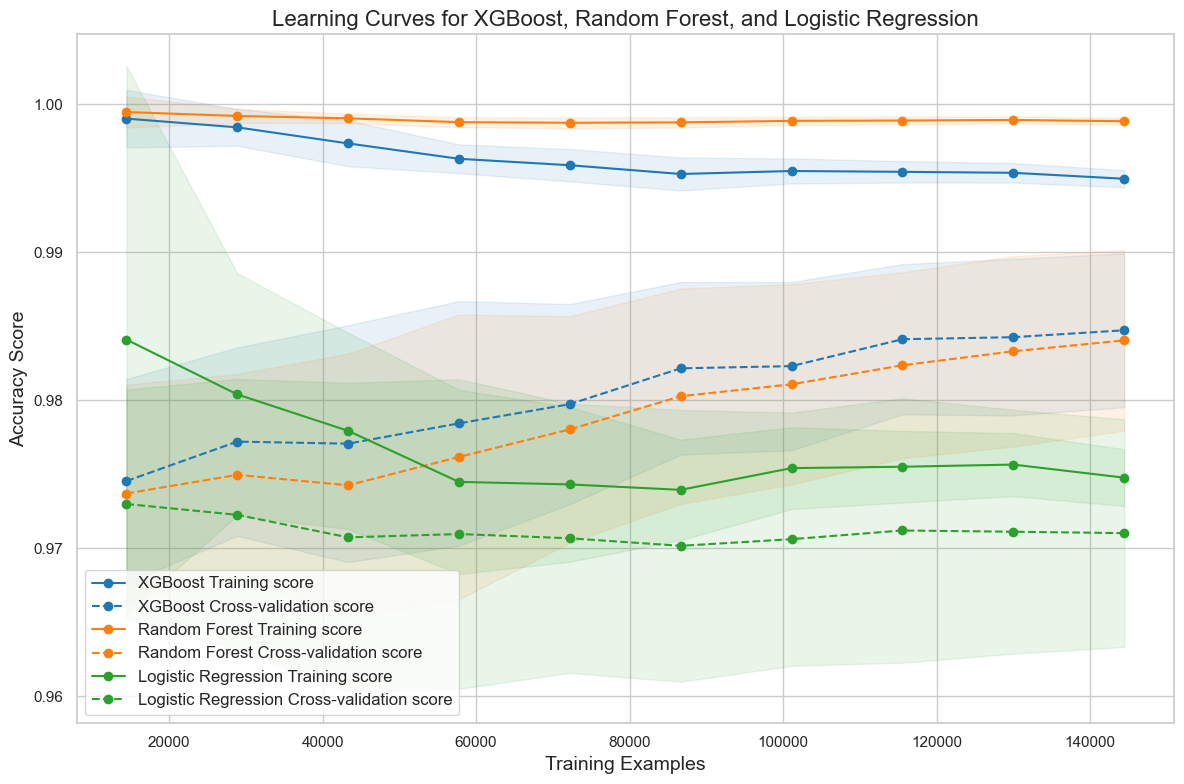

In [149]:
#Learning Curve

sns.set(style="whitegrid")

# preprocess the data
def preprocess_data(data_filtered):

    data_processed = pd.get_dummies(data_filtered, columns=['Type', 'Shipping Mode', 'Customer Segment', 'Order Status'], drop_first=True)

    X = data_processed.drop('late_delivery', axis=1)
    y_class = data_processed['late_delivery']
    
    return X, y_class

# plot the learning curves
def plot_learning_curves(models, model_names, X, y):
    plt.figure(figsize=(12, 8))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  
    
    for model, name, color in zip(models, model_names, colors):
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y, cv=5, scoring="accuracy", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
        )
        
        # calculate the mean and standard deviation of training and testing scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
        # plot the mean training and testing scores with their standard deviations
        plt.plot(train_sizes, train_scores_mean, 'o-', color=color, label=f"{name} Training score")
        plt.plot(train_sizes, test_scores_mean, 'o--', color=color, label=f"{name} Cross-validation score")

        # plot the standard deviations
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                         alpha=0.1, color=color)
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                         alpha=0.1, color=color)
    
    # learning curves settings
    plt.title("Learning Curves for XGBoost, Random Forest, and Logistic Regression", fontsize=16)
    plt.xlabel("Training Examples", fontsize=14)
    plt.ylabel("Accuracy Score", fontsize=14)
    plt.legend(loc="best", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# main function: plot the learning curves
def main(data_filtered):
    # preprocess the data
    X, y_class = preprocess_data(data_filtered)
    
    # define classifier
    xrboost_classifier = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    logistic_classifier = LogisticRegression(max_iter=500, random_state=42)

    # define model names and models
    model_names = ["XGBoost", "Random Forest", "Logistic Regression"]
    models = [xrboost_classifier, rf_classifier, logistic_classifier]

    # plot the learning curves
    plot_learning_curves(models, model_names, X, y_class)

# call the main function
main(data_filtered)


### Premium Calculation Formula

In this project, premiums are calculated using the following formula:

$$
\text{Premium} = (\text{Expected Cost} + \text{Fixed Cost}) \times (1 + \text{Profit Margin})
$$

Where:
- **Expected Cost**: This is calculated based on the model-predicted delay probability (`Delay Probability`) and a base payout (`Base Payout`).
  
  $$
  \text{Expected Cost} = \text{Delay Probability} \times \text{Base Payout}
  $$
  
  - `Delay Probability` is the probability of delay as predicted by the model.
  - `Base Payout` is the amount paid out if a delay occurs, which is set to $100 in the code.
  
- **Fixed Cost**: The fixed operational cost per policy, set to $10 in the code.

- **Profit Margin**: The percentage added to the basic cost to ensure profitability, set to 5% (or 0.05) in the code.

The complete formula for premium calculation is:

$$
\text{Premium} = (\text{Delay Probability} \times \text{Base Payout} + \text{Fixed Cost}) \times (1 + \text{Profit Margin})
$$

This calculation approach ensures that customers with a higher delay probability (higher risk) pay a higher premium, while lower-risk customers pay a lower premium, helping cover expected costs and ensuring profitability.


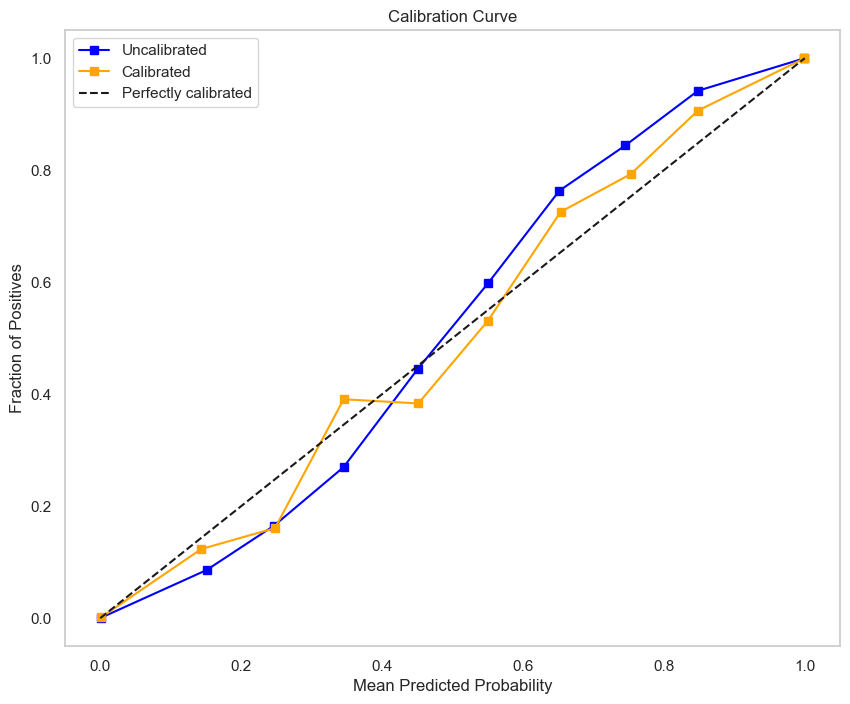

Training data profit margin: 23.33%
Testing data profit margin: 23.32%
Premium Distribution for Testing Data:


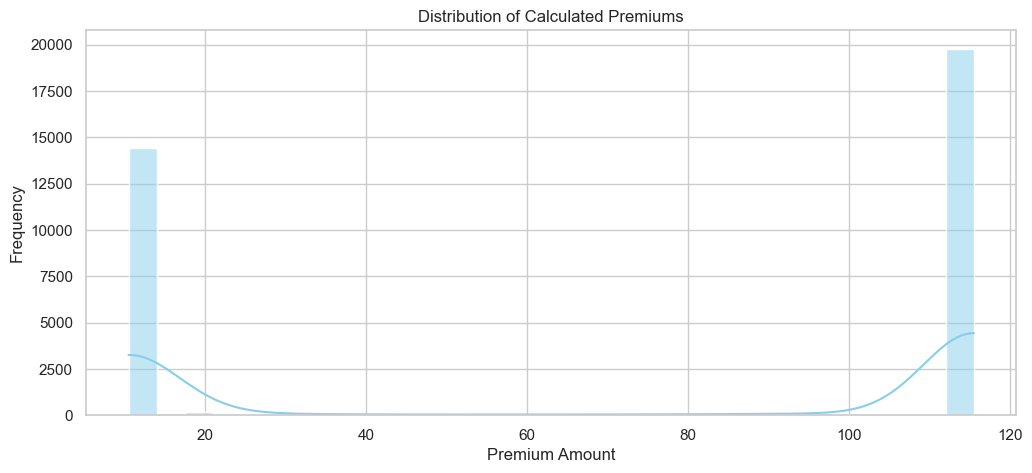

Profit Margins Comparison:


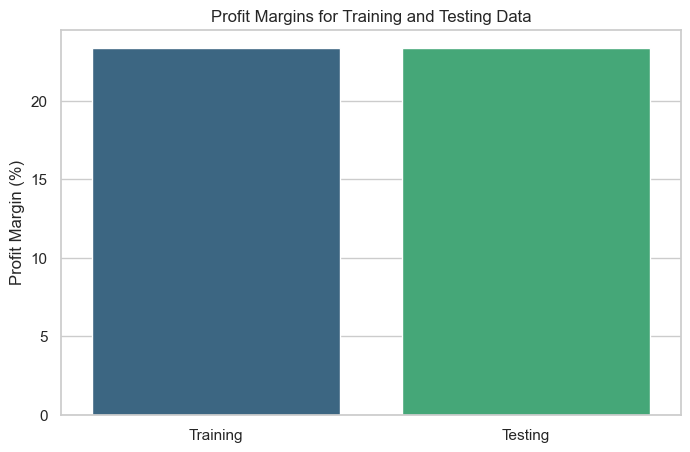

In [150]:


# Preprocess the data to ensure only numeric features
def preprocess_data(data_filtered):
    data_processed = pd.get_dummies(data_filtered, columns=['Type', 'Shipping Mode', 'Customer Segment', 'Order Status'], drop_first=True)
    X = data_processed.drop('late_delivery', axis=1)
    y_class = data_processed['late_delivery']
    return X, y_class

# Train the classifier
def train_classifier(X_train, y_train):
    base_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
    base_model.fit(X_train, y_train)
    return base_model

# Calibrate the model
def calibrate_model(base_model, X_train, y_train):
    calibrated_model = CalibratedClassifierCV(base_model, method='isotonic', cv=5)
    calibrated_model.fit(X_train, y_train)
    return calibrated_model

# Plot calibration curve
def plot_calibration_curve(y_test, y_pred_prob_uncalibrated, y_pred_prob_calibrated):
    plt.figure(figsize=(10, 8))
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_prob_uncalibrated, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Uncalibrated", color="blue")
    
    fraction_of_positives_cal, mean_predicted_value_cal = calibration_curve(y_test, y_pred_prob_calibrated, n_bins=10)
    plt.plot(mean_predicted_value_cal, fraction_of_positives_cal, "s-", label="Calibrated", color="orange")
    
    plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")
    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("Fraction of Positives")
    plt.title("Calibration Curve")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Calculate individual premiums
def calculate_individual_premiums(calibrated_model, X, base_payout=100, fixed_cost=10, profit_margin=0.05):
    delay_probabilities = calibrated_model.predict_proba(X)[:, 1]
    expected_costs = delay_probabilities * base_payout
    premiums = (expected_costs + fixed_cost) * (1 + profit_margin)
    
    premium_data = X.copy()
    premium_data['Delay Probability'] = delay_probabilities
    premium_data['Expected Cost'] = expected_costs
    premium_data['Premium'] = premiums
    return premium_data

# Calculate profit margin
def calculate_profit_margin(premium_data):
    total_expected_cost = premium_data['Expected Cost'].sum()
    total_premium = premium_data['Premium'].sum()
    profit_margin = (total_premium - total_expected_cost) / total_expected_cost * 100
    return profit_margin

# Visualize premium distribution
def visualize_premium_distribution(premium_data):
    plt.figure(figsize=(12, 5))
    sns.histplot(premium_data['Premium'], bins=30, kde=True, color='skyblue')
    plt.title("Distribution of Calculated Premiums")
    plt.xlabel("Premium Amount")
    plt.ylabel("Frequency")
    plt.show()

# Visualize profit margins
def plot_profit_margins(profit_margin_train, profit_margin_test):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=["Training", "Testing"], y=[profit_margin_train, profit_margin_test], palette="viridis")
    plt.title("Profit Margins for Training and Testing Data")
    plt.ylabel("Profit Margin (%)")
    plt.show()

# Main function with enhanced result visualization and print statements
def main(data_filtered):
    # Preprocess the data
    X, y_class = preprocess_data(data_filtered)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)
    
    # Train and calibrate the model
    base_model = train_classifier(X_train, y_train)
    calibrated_model = calibrate_model(base_model, X_train, y_train)
    
    # Compare calibration curves
    y_pred_prob_uncalibrated = base_model.predict_proba(X_test)[:, 1]
    y_pred_prob_calibrated = calibrated_model.predict_proba(X_test)[:, 1]
    plot_calibration_curve(y_test, y_pred_prob_uncalibrated, y_pred_prob_calibrated)
    
    # Calculate individual premiums for training and testing data
    premium_data_train = calculate_individual_premiums(calibrated_model, X_train)
    premium_data_test = calculate_individual_premiums(calibrated_model, X_test)
    
    # Save results to CSV
    premium_data_train.to_csv("premium_data_train.csv", index=False)
    premium_data_test.to_csv("premium_data_test.csv", index=False)
    
    # Calculate and print profit margins
    profit_margin_train = calculate_profit_margin(premium_data_train)
    profit_margin_test = calculate_profit_margin(premium_data_test)
    print(f'Training data profit margin: {profit_margin_train:.2f}%')
    print(f'Testing data profit margin: {profit_margin_test:.2f}%')
    
    # Visualize the premium distribution and profit margins
    print("Premium Distribution for Testing Data:")
    visualize_premium_distribution(premium_data_test)
    
    print("Profit Margins Comparison:")
    plot_profit_margins(profit_margin_train, profit_margin_test)
    
    return premium_data_train, premium_data_test

# Run the main function
premium_data_train, premium_data_test = main(data_filtered)